# Titanic survival prediction

This notebook describes an ML approach to solving the Titanic survival problem. First a brief description of the problem is given. Afterwards the preparation of the data for further analysis takes place, by detecting potential outliers, fill null values, add new features and convert the data into ML readable data. As a next step a exploratory data analysis is provided which considers the distribution of the features, the connection between each feature and the label as well as the correlation between each feature. After this pre-work, different ML algorithms are applied and evaluated to make statements about which algorithm fits the problem best.

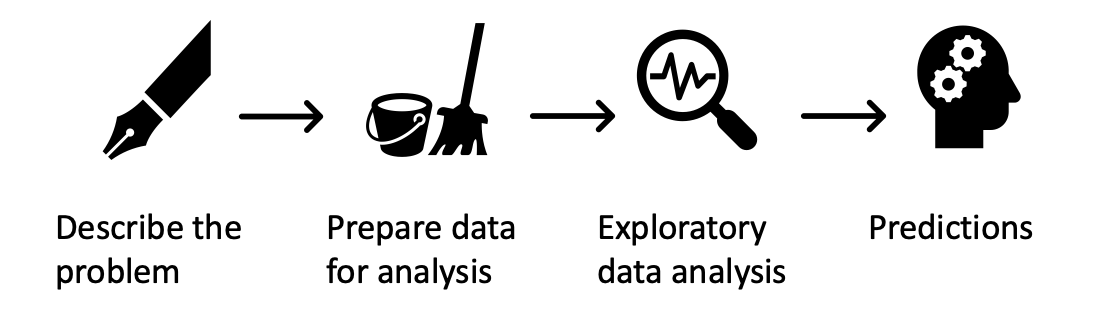

## Table of Contents
1. [Problem description](#Problem-description)
2. [Packages](#Packages)
3. [Prepare data for analysis](#Prepare-data-for-analysis)
    1. [Read data](#Read-data) 
    2. [Outliers](#Outliers)
    3. [Missing values](#Missing-values)
    4. [Feature Engineering](#Feature-Engineering)
    5. [Converting](#Converting)
4. [Exploratory data analysis](#Exploratory-data-analysis)
    1. [Distribution of continous data](#Distribution-of-continous-data)
    2. [Distribution of categorical data](#Distribution-of-categorical-data)
    3. [Correlation survived](#Correlation-survived)
    4. [Pearson correlation heatmap](#Pearson-correlation-heatmap)
5. [ML Algorithmns](#ML-Algorithmns)
    1. [Compare ML-Algorithmns](#Compare-ML-Algorithmns)
    2. [Train-Test-Split](#Train-Test-Split)
    3. [Predictions](#Predictions)

## Problem description

The [Titanic dataset](https://www.kaggle.com/competitions/titanic/data) contains three *csv* files, with __*train.csv* and *test.csv* being relevant__ to this analysis. __*train.csv*__ contains a subset of passengers with certain __features__ such as socioeconomic status, cabin, name, etc. and information whether a passenger __survived or not__. __*test.csv*__ contains another subset of Titanic passengers given with the __same features__ as in the *train.csv* file but __without the survival label__. The Titanic survival problem is defined in __finding labels__ for each passenger __in *test.csv*__ table by using the given features.

## Packages

In [1]:
# fundamental packages
import os
import sys

In [2]:
# packages to read, preprocess and analyse data
import numpy as np
import pandas as pd

In [3]:
# packages to visualize data
import seaborn as sns
import matplotlib as mpl

In [4]:
# ML packages
import sklearn as skl

In [5]:
print(f'Python version: {sys.version}')
print(f'numpy version: {np.__version__}')
print(f'pandas version: {pd.__version__}')
print(f'seaborn version: {sns.__version__}')
print(f'matplotlib version: {mpl.__version__}')
print(f'scikit-learn version: {skl.__version__}')
print('-'*85)
print('Titanic dataset files: ')
for file in os.listdir('/kaggle/input/titanic'): 
    print(f'- {file}')

Python version: 3.7.12 | packaged by conda-forge | (default, Oct 26 2021, 06:08:53) 
[GCC 9.4.0]
numpy version: 1.21.6
pandas version: 1.3.5
seaborn version: 0.11.2
matplotlib version: 3.5.2
scikit-learn version: 1.0.2
-------------------------------------------------------------------------------------
Titanic dataset files: 
- train.csv
- test.csv
- gender_submission.csv


## Prepare data for analysis

The data preparation is performed as explained in the following diagram.

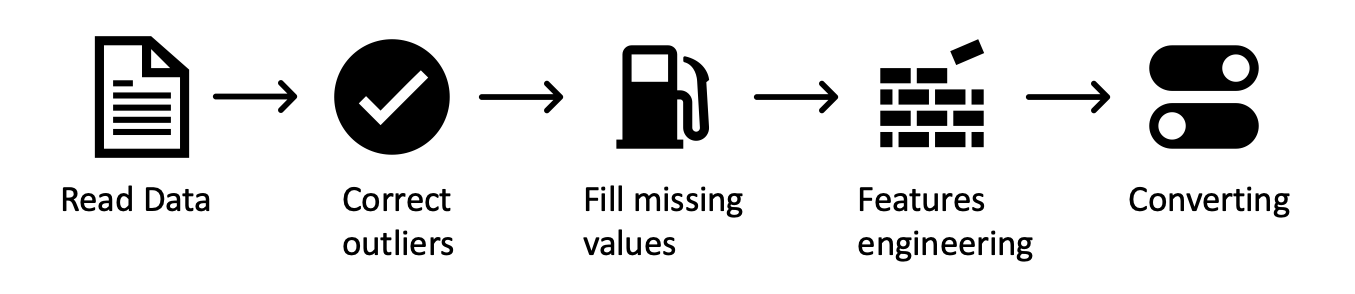

### Read data

In [6]:
# raw data 
data_raw = pd.read_csv('/kaggle/input/titanic/train.csv')


# make copy of raw data to performe operations 
# on raw data without touching it
data = data_raw.copy(deep=True)


# data to make prediction on
data_val = pd.read_csv('/kaggle/input/titanic/test.csv')


# list of both datasets in order to apply data 
# operations on both train and valuation dataset 
# easier
datasets = [data, data_val]

__Brief data insights__

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* Data consists of __int, float and categorical__ data and there are __missing values__ 
* There are 10 features and one target

In [8]:
data_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


* Valuation data consists of same features

In [9]:
data.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
310,311,1,1,"Hays, Miss. Margaret Bechstein",female,24.0,0,0,11767,83.1583,C54,C
225,226,0,3,"Berglund, Mr. Karl Ivar Sven",male,22.0,0,0,PP 4348,9.3500,NaN,S
307,308,1,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.0,1,0,PC 17758,108.9000,C65,C
449,450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.5000,C104,S
547,548,1,2,"Padro y Manent, Mr. Julian",male,NaN,0,0,SC/PARIS 2146,13.8625,NaN,C
465,466,0,3,"Goncalves, Mr. Manuel Estanslas",male,38.0,0,0,SOTON/O.Q. 3101306,7.0500,NaN,S
186,187,1,3,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",female,NaN,1,0,370365,15.5000,NaN,Q
371,372,0,3,"Wiklund, Mr. Jakob Alfred",male,18.0,1,0,3101267,6.4958,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
580,581,1,2,"Christy, Miss. Julie Rachel",female,25.0,1,1,237789,30.0000,NaN,S


### Outliers

#### Numerical outliers

In [10]:
def num_boundaries(df) -> None:
    for col in df.columns:
        if np.issubdtype(df[col], np.number):
            print(f'{col}: {df[col].dtype}')
            print(f'- min: {df[col].min()}')
            print(f'- max: {df[col].max()}\n')

In [11]:
num_boundaries(data)

PassengerId: int64
- min: 1
- max: 891

Survived: int64
- min: 0
- max: 1

Pclass: int64
- min: 1
- max: 3

Age: float64
- min: 0.42
- max: 80.0

SibSp: int64
- min: 0
- max: 8

Parch: int64
- min: 0
- max: 6

Fare: float64
- min: 0.0
- max: 512.3292



In [12]:
num_boundaries(data_val)

PassengerId: int64
- min: 892
- max: 1309

Pclass: int64
- min: 1
- max: 3

Age: float64
- min: 0.17
- max: 76.0

SibSp: int64
- min: 0
- max: 8

Parch: int64
- min: 0
- max: 9

Fare: float64
- min: 0.0
- max: 512.3292



__Can't detect__ any numerical __outliers__ so far

#### Categorical outliers

In [13]:
def cat_structure(df, max_unique=5) -> None:
    for col in df.columns:
        if df[col].dtype.name == 'object':
            unique_elements = df[col].unique()
            unique_count = len(unique_elements)
            print(f'{col}: {df[col].dtype}')
            print(f'- unique: {unique_count}')
            if unique_count <= max_unique:
                print(f'- elements: {unique_elements}')
            print('\n')

In [14]:
cat_structure(data)

Name: object
- unique: 891


Sex: object
- unique: 2
- elements: ['male' 'female']


Ticket: object
- unique: 681


Cabin: object
- unique: 148


Embarked: object
- unique: 4
- elements: ['S' 'C' 'Q' nan]




In [15]:
cat_structure(data_val)

Name: object
- unique: 418


Sex: object
- unique: 2
- elements: ['male' 'female']


Ticket: object
- unique: 363


Cabin: object
- unique: 77


Embarked: object
- unique: 3
- elements: ['Q' 'S' 'C']




__Can't detect__ any categorical __outliers__ so far

### Missing values

In [16]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
data_val.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

There are missing values in columns __'Age', 'Cabin', 'Embarked', 'Fare'__. 
* Fill Age and Fare with median values
* Fill Embarked with mode
* Delete Cabin column later due to high missing rate

In [18]:
for dataset in datasets:
    dataset['Age'].fillna(dataset['Age'].median(), inplace=True)
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace=True)
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)

In [19]:
# Check if there are still missing values in train dataset
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [20]:
# Check if there are still missing values in dataset
data_val.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [21]:
# Drop Ticket column due to low information content 
# and Cabin due to low availability
for dataset in datasets:
    dataset.drop(['Ticket', 'Cabin'], axis=1, inplace=True)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [23]:
data_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         418 non-null    float64
 8   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 29.5+ KB


### Feature Engineering

In [24]:
# Add new features to data
for dataset in datasets:
    dataset['FamSize'] = dataset['SibSp'] + dataset['Parch'] + 1 # defines the size of the family by summing number of siblings\spouse and parents\children
    dataset['Alone'] = dataset['FamSize'].map(lambda size: 1 if size == 1 else 0) # defines whether as person travels alone or not
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0] # extracts the title of a person from the name column
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4) # defines bins of the continous variable Fare
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5) # defines bins of the continous variable Age

In [25]:
# Which titles do emerge
data['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [26]:
# Define a mapping which maps Mr, Miss, Mrs, Master, Dr 
# identically and any other Title to other
def mapping_title(title) -> str:
    if title in ['Mr', 'Miss', 'Mrs', 'Master', 'Dr']:
        return title
    else:
        return 'other'

In [27]:
# Apply mapping_title to the Title column
for dataset in datasets:
    dataset['Title'] = dataset['Title'].map(mapping_title)

### Converting

In [28]:
# object / category columns need to be converted to an 
# int column in order to be readable for ML-algorithmns. 
# Therefore check which columns need to be converted 
# to int! --> Sex, Embarked, Title, FareBin, AgeBin
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Fare         891 non-null    float64 
 9   Embarked     891 non-null    object  
 10  FamSize      891 non-null    int64   
 11  Alone        891 non-null    int64   
 12  Title        891 non-null    object  
 13  FareBin      891 non-null    category
 14  AgeBin       891 non-null    category
dtypes: category(2), float64(2), int64(7), object(4)
memory usage: 92.8+ KB


In [29]:
# Convert object / category columns as mentioned above 
# by using Scikit-learns LabelEncoder
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for dataset in datasets:
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['Fare_Code'] = label.fit_transform(dataset['FareBin'])
    dataset['Age_Code'] = label.fit_transform(dataset['AgeBin'])

In [30]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,Alone,Title,FareBin,AgeBin,Sex_Code,Embarked_Code,Title_Code,Fare_Code,Age_Code
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,"(-0.001, 7.91]","(16.0, 32.0]",1,2,3,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]",0,0,4,3,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,"(7.91, 14.454]","(16.0, 32.0]",0,2,2,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]",0,2,4,3,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]",1,2,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,1,1,other,"(7.91, 14.454]","(16.0, 32.0]",1,2,5,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,1,1,Miss,"(14.454, 31.0]","(16.0, 32.0]",0,2,2,2,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,23.4500,S,4,0,Miss,"(14.454, 31.0]","(16.0, 32.0]",0,2,2,2,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,1,1,Mr,"(14.454, 31.0]","(16.0, 32.0]",1,0,3,2,1


In [31]:
# Define features
target = ['Survived']
features_original = ['Pclass', 'SibSp', 'Parch', 'FamSize', 'Alone', 'Sex', 'Embarked', 'Title', 'Fare', 'Age']
features_bins = ['Pclass', 'SibSp', 'Parch', 'FamSize', 'Alone', 'Sex', 'Embarked', 'Title', 'FareBin', 'AgeBin']
features = ['Pclass', 'SibSp', 'Parch', 'FamSize', 'Alone', 'Sex_Code', 'Embarked_Code', 'Title_Code', 'Fare_Code', 'Age_Code']
target_and_features = target + features

## Exploratory data analysis

### Distribution of continous data

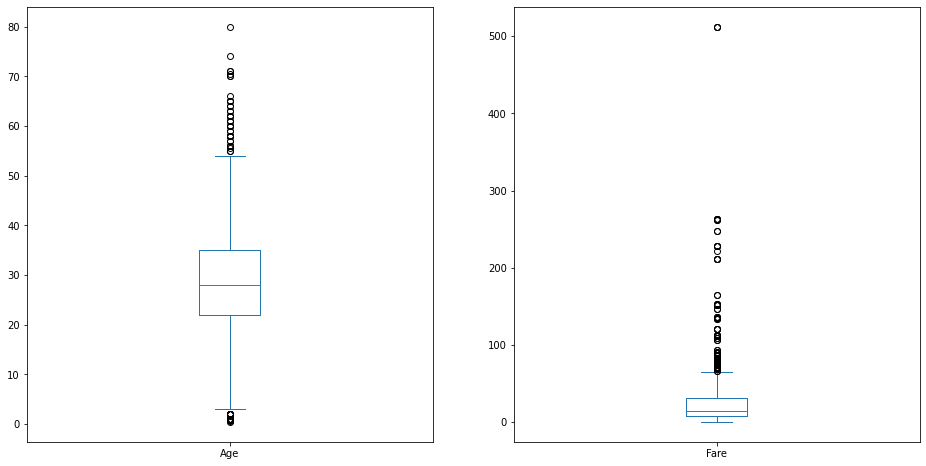

In [32]:
data[['Age', 'Fare']].plot(
    kind='box', 
    figsize=(16, 8), 
    subplots=True
);

### Distribution of categorical data

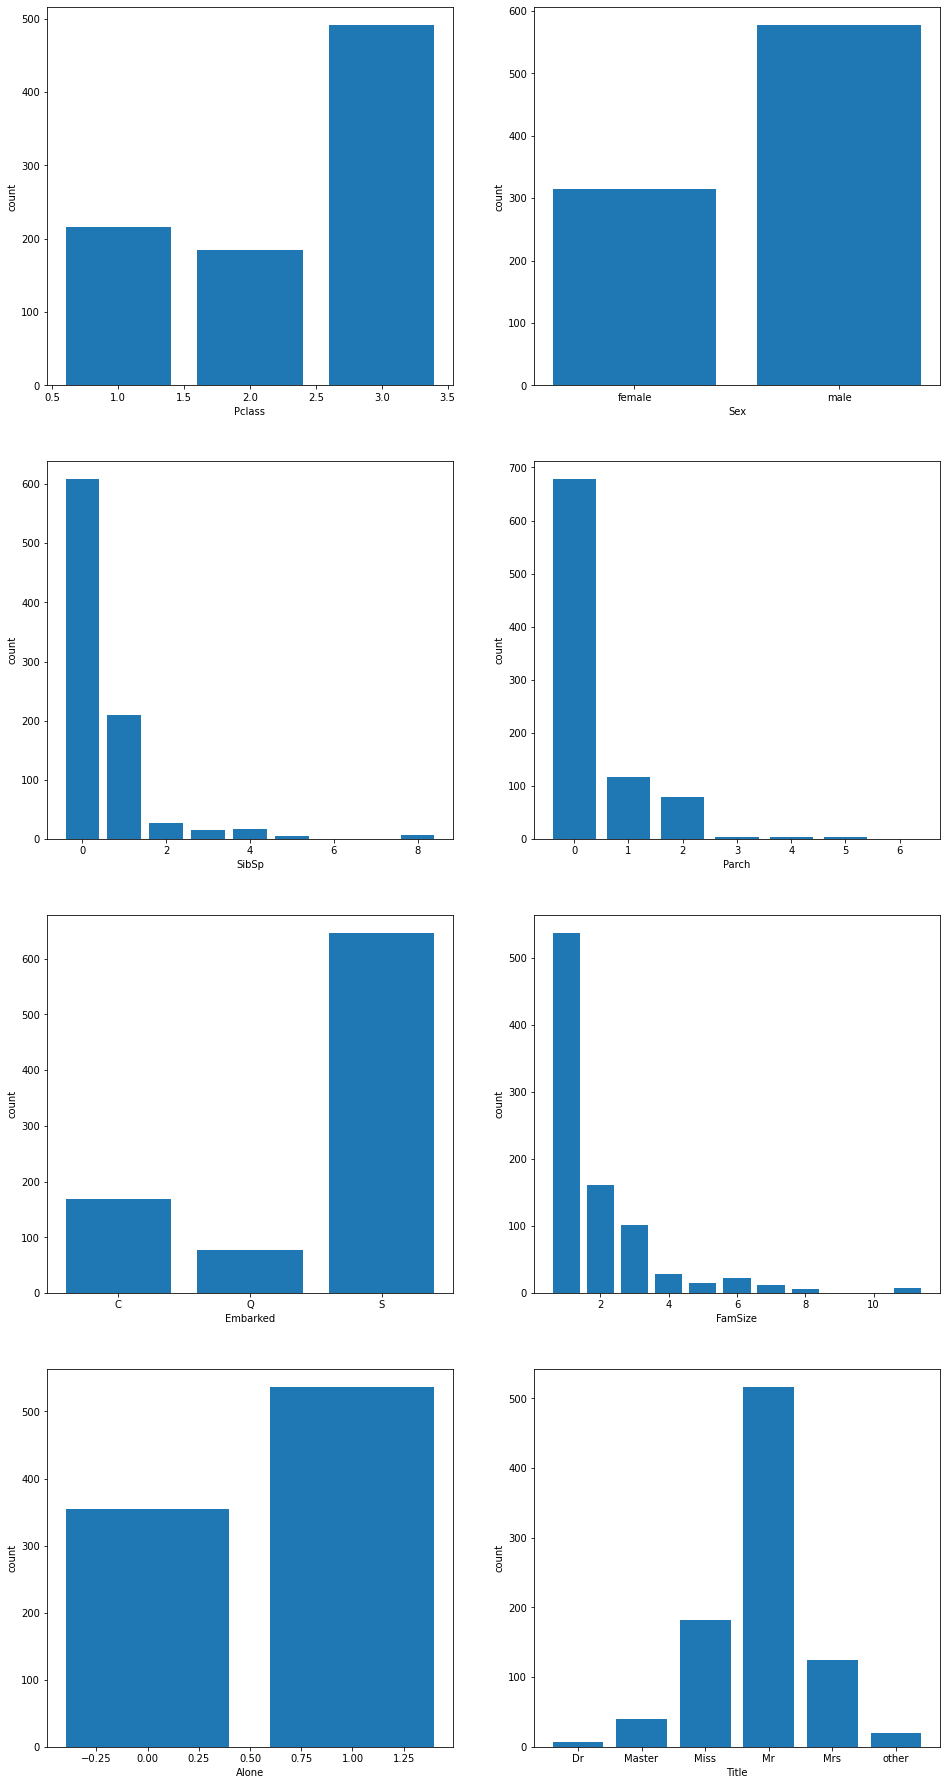

In [33]:
import matplotlib.pyplot as plt

cat_features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'FamSize', 'Alone', 'Title']

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(16, 32))

for ax, col in zip(axs.reshape(-1), cat_features):
    hist_data = data[col].value_counts().sort_index()
    ax.bar(
        x=hist_data.index,
        height=hist_data.values
    )
    
    ax.set_xlabel(col)
    ax.set_ylabel('count')

plt.show();

### Chance of survival by category

In [34]:
for x in features_bins:
    if data[x].dtype != 'float64' :
        print('Chance of survival by:', x)
        print(data[[x, target[0]]].groupby(x).mean())
        print('-'*30, '\n')

Chance of survival by: Pclass
        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363
------------------------------ 

Chance of survival by: SibSp
       Survived
SibSp          
0      0.345395
1      0.535885
2      0.464286
3      0.250000
4      0.166667
5      0.000000
8      0.000000
------------------------------ 

Chance of survival by: Parch
       Survived
Parch          
0      0.343658
1      0.550847
2      0.500000
3      0.600000
4      0.000000
5      0.200000
6      0.000000
------------------------------ 

Chance of survival by: FamSize
         Survived
FamSize          
1        0.303538
2        0.552795
3        0.578431
4        0.724138
5        0.200000
6        0.136364
7        0.333333
8        0.000000
11       0.000000
------------------------------ 

Chance of survival by: Alone
       Survived
Alone          
0      0.505650
1      0.303538
------------------------------ 

Chance of survival by: Sex
        Survived
Sex     

* With decreasing Pclass the chance of survival decreases
* One has better chance to survive when traveling with other people
* Chance of survival is signficantly higher for women
* Chance of survival is highest for people embarked in Cherbourg
* The higher the fare the higher chance of survival
* Children have a better chance to survive, 64+ have only 9% chance to survive

### Pearson correlation heatmap

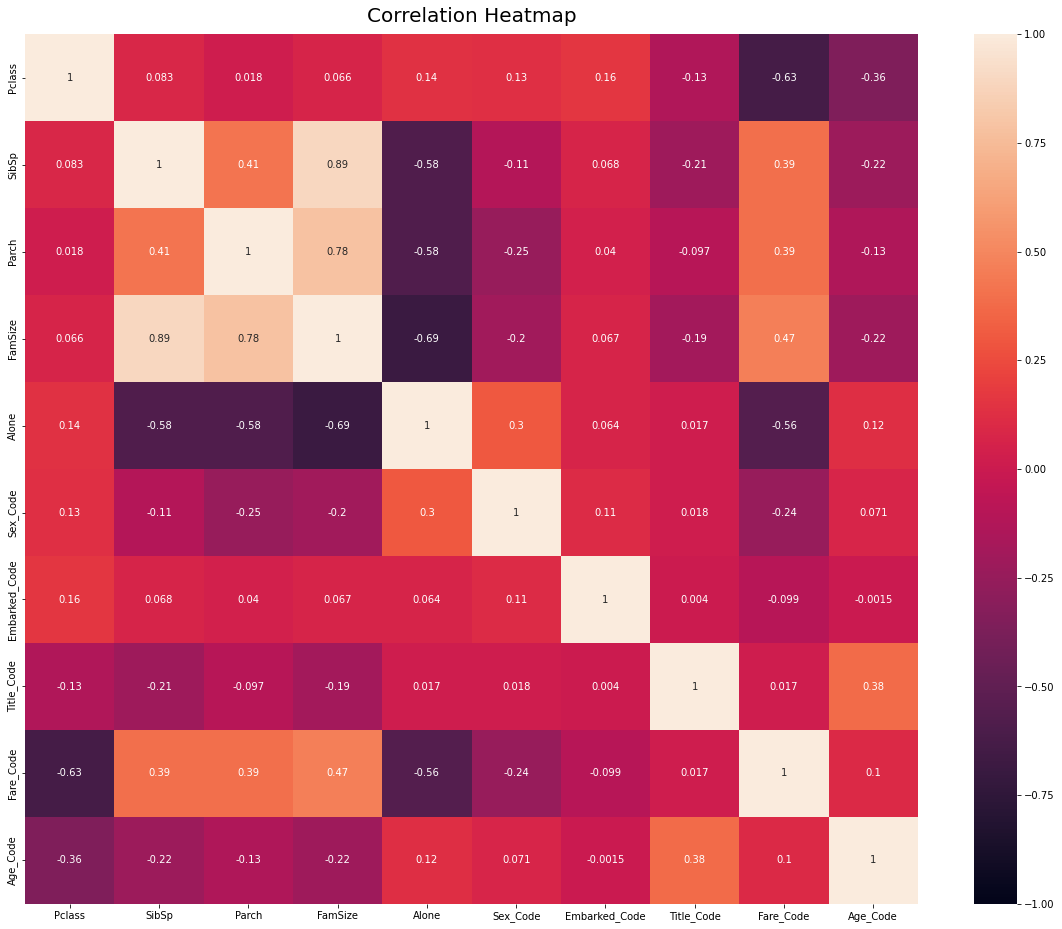

In [35]:
plt.figure(figsize=(20,16))
heatmap = sns.heatmap(data[features].corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12);

Highly correlated:
* Fare and Pclass
* Famsize and SibSp
* Alone and SibSp
* Famsize and Parch
* Alone and Famsize

## ML Algorithmns

### Compare ML-Algorithmns

In [36]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

In [37]:
algos = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()    
]

In [38]:
# Compare different ML Algorithmn accurancies without 
# hyperparameter tuning

from sklearn import model_selection
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0)

alg_columns = ['Alg Name', 'Parameters','Train Accuracy Mean', 'Test Accuracy Mean', 'Test Accuracy 3*STD' ,'Time']
alg_compare = pd.DataFrame(columns = alg_columns)

for idx, alg in tqdm(enumerate(algos)):
    alg_name = alg.__class__.__name__
    alg_compare.loc[idx, 'Alg Name'] = alg_name
    alg_compare.loc[idx, 'Parameters'] = str(alg.get_params())
    
    cv_results = model_selection.cross_validate(alg, data[features], data[target], cv  = cv_split, return_train_score=True)
    
    alg_compare.loc[idx, 'Time'] = cv_results['fit_time'].mean()
    alg_compare.loc[idx, 'Train Accuracy Mean'] = cv_results['train_score'].mean().round(3)
    alg_compare.loc[idx, 'Test Accuracy Mean'] = cv_results['test_score'].mean().round(3)
    alg_compare.loc[idx, 'Test Accuracy 3*STD'] = (cv_results['test_score'].std()*3).round(3)
    
alg_compare.sort_values(by=['Test Accuracy Mean', 'Train Accuracy Mean'], ascending=False, inplace=True)
alg_compare

22it [00:15,  1.40it/s]


,Alg Name,Parameters,Train Accuracy Mean,Test Accuracy Mean,Test Accuracy 3*STD,Time
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.9,0.822,0.049,0.141151
14,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.832,0.822,0.049,0.054598
15,NuSVC,"{'break_ties': False, 'cache_size': 200, 'clas...",0.831,0.822,0.05,0.06332
21,XGBClassifier,"{'objective': 'binary:logistic', 'use_label_en...",0.896,0.821,0.068,0.275576
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.895,0.82,0.053,0.020962
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.872,0.818,0.051,0.072896
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",0.9,0.815,0.05,0.116154
17,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.9,0.809,0.061,0.003344
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.824,0.806,0.062,0.070199
5,GaussianProcessClassifier,"{'copy_X_train': True, 'kernel': None, 'max_it...",0.88,0.8,0.058,0.186158


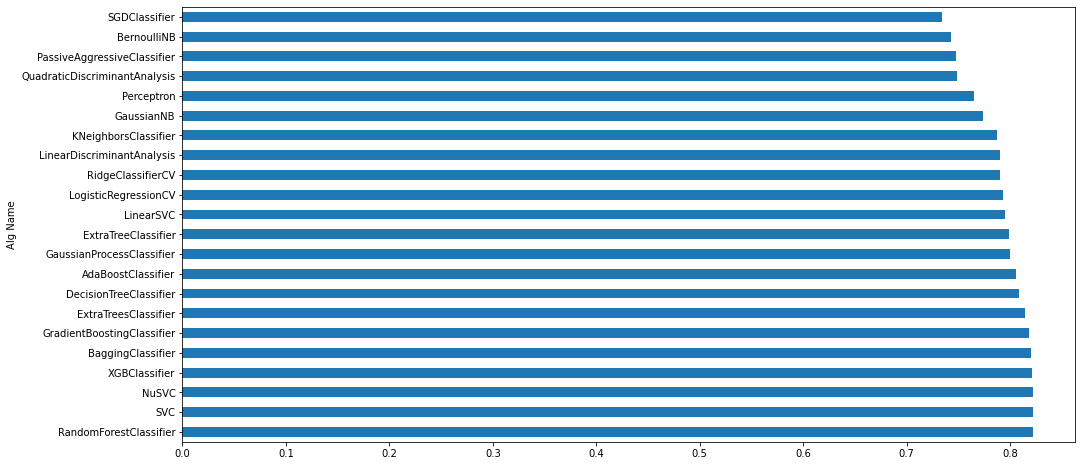

In [39]:
alg_compare.plot.barh(
    x='Alg Name',
    y='Test Accuracy Mean',
    legend=False,
    figsize=(16,8)
);

### Train-Test-Split

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], random_state=0)

### Predictions

In [41]:
from sklearn.metrics import accuracy_score

mdl = svm.SVC(probability=True)
mdl.fit(X_train, y_train)
test_pred = mdl.predict(X_test)

mdl_acc = accuracy_score(test_pred, y_test)

print(f'{mdl.__class__.__name__} provides accuracy of {(mdl_acc * 100).round(2)}%')

SVC provides accuracy of 81.17%


In [42]:
pred = mdl.predict(data_val[features])

In [43]:
submission_dict = {
    'PassengerId': data_val['PassengerId'],
    'Survived': pred
}
submission = pd.DataFrame(submission_dict)

In [44]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [45]:
submission.to_csv('submission.csv', index=False)